In [1]:
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
def read_csv() -> DataFrame:
    return pd.read_csv('chicago_taxi_trips_2016_12.csv',
                       parse_dates=True,
                       infer_datetime_format=True)

In [3]:
def get_mode_stats(df) -> list:
    res = []
    for index, column in enumerate(df):
        frequencies = df[column].value_counts()
        res.append(
            {
                'col': column,
                'first_mode': frequencies.index[0],
                'fm_freq': frequencies[0],
                'fm_perc': (frequencies[0] / len(df)) * 100,
                'second_mode': frequencies.index[1],
                'sm_freq': frequencies[1],
                'sm_perc': (frequencies[1] / len(df)) * 100
            })
    return res

In [4]:
def get_stats(df, numeric = True):
    stats = pd.DataFrame(df.describe(include='all'))
    if (numeric):
        return {
            'val_num': len(df),
            'missing_values_perc': 100-(stats.loc['count']/len(df))*100,
            'cardinality': df.nunique(),
            'min_val': stats.loc['min'],
            'max_val': stats.loc['max'],
            'first_quartile': stats.loc['25%'],
            'third_quartile': stats.loc['75%'],
            'average': stats.loc['mean'],
            'median': stats.loc['50%'],
            'st_dev': stats.loc['std']
            }
    else:
        return {
            'val_num': len(df),
            'missing_values_perc': 100-(stats.loc['count']/len(df))*100,
            'cardinality': df.nunique(),
            'modes': get_mode_stats(df)
            }
        

In [5]:
def print_histograms(data, numeric = True):
    tot = 'Total values: {tot}'
    display(Markdown(tot.format(tot=data['val_num'])))
    data['missing_values_perc'].plot(kind='bar', title='Percentage of missing values')
    plt.show()
    data['cardinality'].plot(kind='bar', title='Cardinality')
    plt.show()
    if (numeric):        
        data['min_val'].plot(kind='bar', title='Minimum values')
        plt.show()
        data['max_val'].plot(kind='bar', title='Maximum values')
        plt.show()
        data['first_quartile'].plot(kind='bar', title='First quartile')
        plt.show()
        data['third_quartile'].plot(kind='bar', title='Third quartile')
        plt.show()
        data['average'].plot(kind='bar', title='Mean')
        plt.show()
        data['median'].plot(kind='bar', title='Median')
        plt.show()
        data['st_dev'].plot(kind='bar', title='Standard deviation')
        plt.show()
    else:
        for index, column in enumerate(data['modes']):
            column = '### Column: {c}'
            display(Markdown(column.format(c=data['modes'][index]['col'])))

            first_mode='#### First mode: {fm}'
            display(Markdown(first_mode.format(fm=data['modes'][index]['first_mode'])))
            fm_freq='Frequency of first mode: {fmf}'
            display(Markdown(fm_freq.format(fmf=data['modes'][index]['fm_freq'])))
            fm_perc='Percentage of first mode: {fmp}'
            display(Markdown(fm_perc.format(fmp=data['modes'][index]['fm_perc'])))
            second_mode='#### Second mode: {sm}'
            display(Markdown(second_mode.format(sm=data['modes'][index]['second_mode'])))
            sm_freq='Frequency of second mode: {smf}'
            display(Markdown(sm_freq.format(smf=data['modes'][index]['sm_freq'])))
            fm_perc='Percentage of second mode: {smp}'
            display(Markdown(fm_perc.format(smp=data['modes'][index]['sm_perc'])))

In [6]:
def print_scatter_plots(data, numeric = True):
    if (numeric):
        data.plot.scatter(x='trip_miles', y='trip_total')
        plt.show()
        display(Markdown('1. The above plot shows that price fluctuates a lot when trip miles tend to 0'))
        display(Markdown('2. Price generally stays low even when miles get higher'))
        
        data.plot.scatter(x='trip_total', y='tips')
        plt.show()
        display(Markdown('1. The above plot shows that customers are more willing to pay higher tips if their trip total price is low'))
    else:
        data.plot.scatter(x='payment_type', y='fare')
        plt.show()
        display(Markdown('1. The above plot shows that customers prefer paying in cash when fares get higher'))

In [7]:
def main() -> None:
    pd.set_option('display.max_columns', 75)
    
    df: DataFrame = read_csv()

    numerics_df: DataFrame = df.select_dtypes(include='number')
    categoricals_df: DataFrame = df.select_dtypes(exclude='number')

    numerics = get_stats(numerics_df)
    categoricals = get_stats(categoricals_df, False)
    
    print(numerics, end='\n\n')
    print(categoricals, end='\n\n')

    display(Markdown('# Continuous values histograms'))
    print_histograms(numerics)
    display(Markdown('# Categorical values histograms'))
    print_histograms(categoricals, False)
    
    display(Markdown('# Data quality problems'))
    display(Markdown('1. The entire "pickup_census_tract" column has no values'))
    display(Markdown('2. A little less than half of values in "company" and "dropoff_census_tract" columns are missing'))
    display(Markdown('3. There are also other values missing in other columns'))
    display(Markdown('# Scatterplot'))
    
    print_scatter_plots(numerics_df)
    print_scatter_plots(df, numeric=False)
    
    display(Markdown('# Numerics covariance: '))
    print(numerics_df.cov())
    display(Markdown('# Numerics correlation: '))
    print(numerics_df.corr())

{'val_num': 1245712, 'missing_values_perc': taxi_id                     0.049610
trip_seconds                0.007867
trip_miles                  0.001766
pickup_census_tract       100.000000
dropoff_census_tract       36.803852
pickup_community_area       9.179570
dropoff_community_area     10.741728
fare                        0.001846
tips                        0.001846
tolls                       0.001846
extras                      0.001846
trip_total                  0.001846
company                    46.110738
pickup_latitude             9.179008
pickup_longitude            9.179008
dropoff_latitude           10.633437
dropoff_longitude          10.633437
Name: count, dtype: float64, 'cardinality': taxi_id                   4550
trip_seconds              3855
trip_miles                2868
pickup_census_tract          0
dropoff_census_tract       421
pickup_community_area       77
dropoff_community_area      77
fare                      1247
tips                      1516
toll

# Continuous values histograms

Total values: 1245712

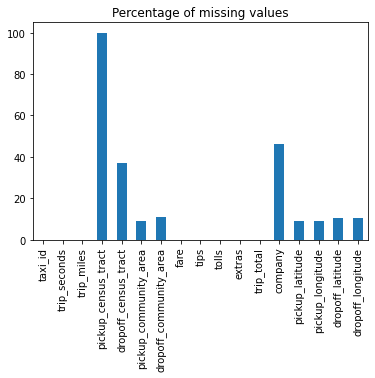

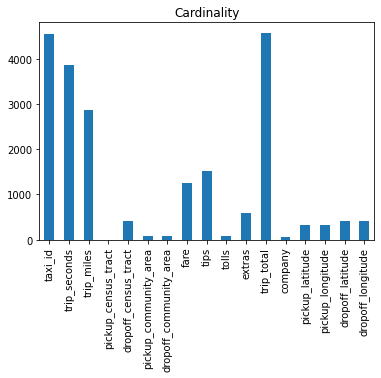

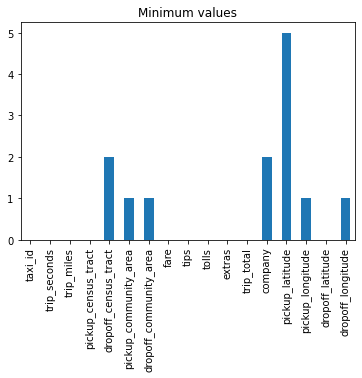

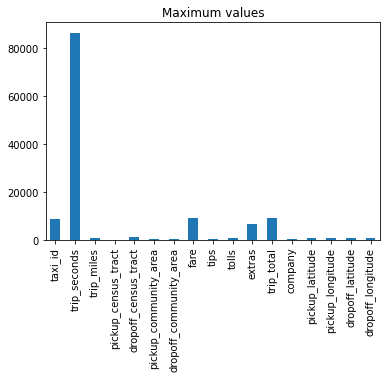

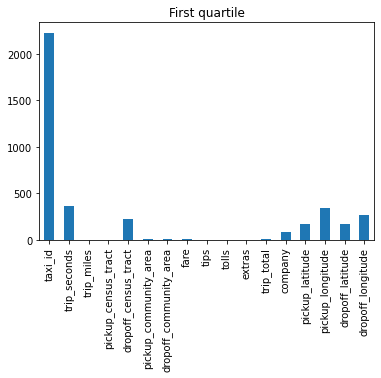

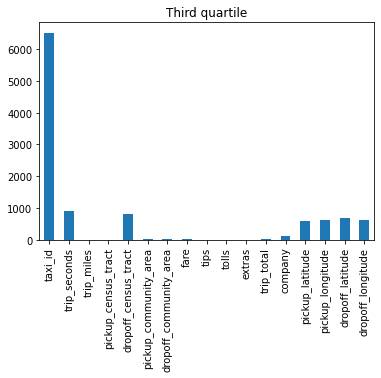

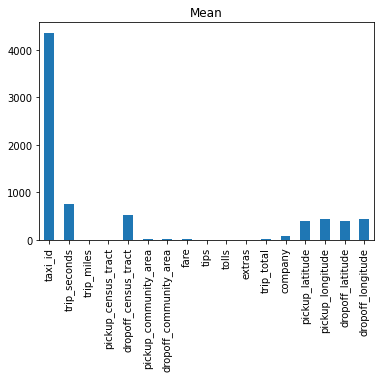

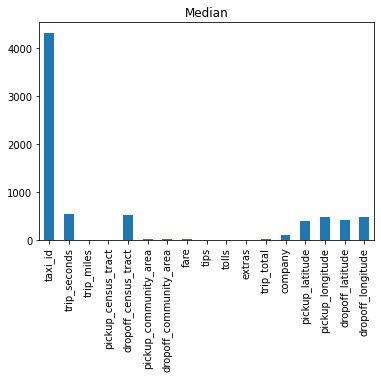

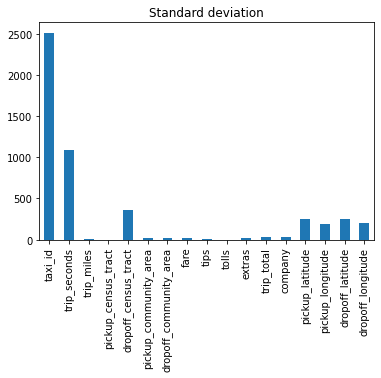

# Categorical values histograms

Total values: 1245712

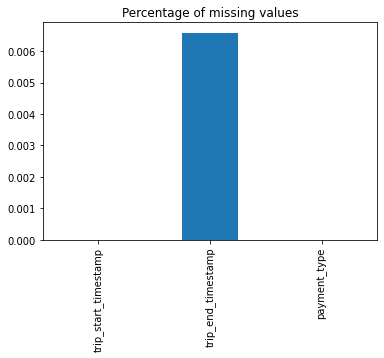

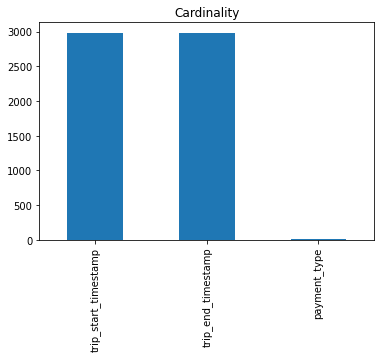

### Column: trip_start_timestamp

#### First mode: 2016-12-16 19:00:00

Frequency of first mode: 1201

Percentage of first mode: 0.09641072735913277

#### Second mode: 2016-12-9 18:45:00

Frequency of second mode: 1181

Percentage of second mode: 0.09480521982609141

### Column: trip_end_timestamp

#### First mode: 2016-12-9 19:15:00

Frequency of first mode: 1224

Percentage of first mode: 0.0982570610221303

#### Second mode: 2016-12-16 19:00:00

Frequency of second mode: 1200

Percentage of second mode: 0.0963304519824807

### Column: payment_type

#### First mode: Cash

Frequency of first mode: 711456

Percentage of first mode: 57.11239837137316

#### Second mode: Credit Card

Frequency of second mode: 523462

Percentage of second mode: 42.021109213044426

# Data quality problems

1. The entire "pickup_census_tract" column has no values

2. A little less than half of values in "company" and "dropoff_census_tract" columns are missing

3. There are also other values missing in other columns

# Scatterplot

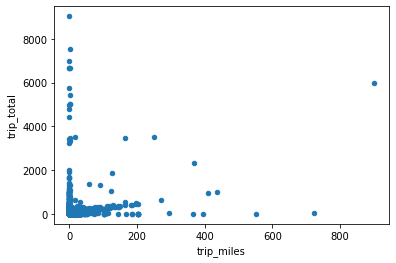

1. The above plot shows that price fluctuates a lot when trip miles tend to 0

2. Price generally stays low even when miles get higher

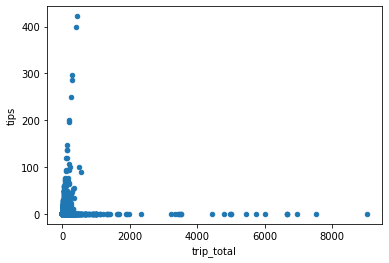

1. The above plot shows that customers are more willing to pay higher tips if their trip total price is low

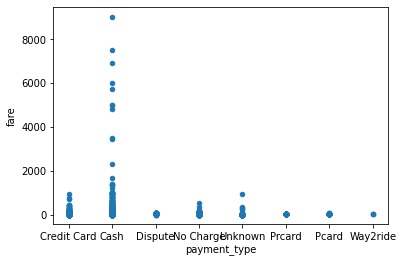

1. The above plot shows that customers prefer paying in cash when fares get higher

# Numerics covariance: 

                             taxi_id  trip_seconds   trip_miles  \
taxi_id                 6.308543e+06 -5.054298e+02    29.144148   
trip_seconds           -5.054298e+02  1.189311e+06  2328.019077   
trip_miles              2.914415e+01  2.328019e+03    24.152690   
pickup_census_tract              NaN           NaN          NaN   
dropoff_census_tract   -2.049707e+03  4.401990e+03    16.064344   
pickup_community_area   2.405229e+01  4.336470e+03    33.759684   
dropoff_community_area  9.803946e+01  2.353652e+03    17.373764   
fare                   -2.433315e+01  7.660400e+03    52.727234   
tips                    9.882565e+00  7.556052e+02     5.829834   
tolls                   8.674637e+00  2.450598e+01     0.107991   
extras                  5.131190e+01  5.308070e+02     4.777917   
trip_total              5.327988e+01  8.984158e+03    63.605012   
company                -1.416350e+03  2.097982e+02    18.644095   
pickup_latitude         2.007293e+03 -1.274501e+03     7.25560

# Numerics correlation: 

                         taxi_id  trip_seconds  trip_miles  \
taxi_id                 1.000000     -0.000184    0.002361   
trip_seconds           -0.000184      1.000000    0.434352   
trip_miles              0.002361      0.434352    1.000000   
pickup_census_tract          NaN           NaN         NaN   
dropoff_census_tract   -0.002282      0.013353    0.009952   
pickup_community_area   0.000509      0.222927    0.371726   
dropoff_community_area  0.002303      0.138929    0.225070   
fare                   -0.000450      0.326192    0.498237   
tips                    0.001482      0.261036    0.446931   
tolls                   0.002740      0.017831    0.017437   
extras                  0.001341      0.031952    0.063824   
trip_total              0.000762      0.295887    0.464858   
company                -0.014563      0.007866    0.110011   
pickup_latitude         0.003144     -0.004847    0.005911   
pickup_longitude        0.000865     -0.097923   -0.160775   
dropoff_

In [8]:
if (__name__ == '__main__'):
    main()